In [57]:
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import numpy as np
import datetime as dt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy

# Create our portfolio of equities

tickers = ['ABC','AMZN','ROP','EW','GOOGL','ORCL','TRIP','NDAQ','AAP','DOV',
           'DXC','EMN','HOG','ROL','COG']

# Set the investment weights

min_var_w = [0.137674,0.008920,0.094707,0.033843,0.037548,0.147295,0.035644,
             0.171229,0.069795,0.021174,0.015990,0.003764,0.007087,0.178902,
             0.036428]

sharpe_w = [0.007297,0.164912,0.160773,0.133058,0.093332,0.003247,0.002753,
            0.034738,0.013288,0.049795,0.153768,0.070718,0.021322,0.090765,
            0.000234]

equal_w = [0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,
           0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,
           0.066667,]

weights = np.array(sharpe_w)

# Set an initial investment level
initial_investment = 1000000

# Download closing prices
data = pdr.get_data_yahoo(tickers, start="2015-1-1", end="2017-12-31")['Close']

#From the closing prices, calculate periodic returns
returns = data.pct_change()

returns.tail()

Symbols,ABC,AMZN,ROP,EW,GOOGL,ORCL,TRIP,NDAQ,AAP,DOV,DXC,EMN,HOG,ROL,COG
Date,,,,,,,,,,,,,,,
2017-12-22,-0.005700,-0.005448,0.004451,-0.007149,-0.001858,0.001692,-0.004894,0.009151,0.004195,-0.003966,-0.004464,-0.002798,0.000579,-0.008961,-0.004690
2017-12-26,0.008544,0.007190,0.004585,-0.002934,-0.002816,0.001478,-0.001157,0.000526,0.014023,0.006570,0.000104,0.003562,-0.001350,0.004736,0.018485
2017-12-27,-0.006971,0.004674,-0.000422,0.008916,-0.005301,-0.001054,0.000000,0.002758,-0.021479,0.000198,-0.012200,-0.004840,-0.009465,0.002786,0.001068
2017-12-28,-0.000108,0.003248,-0.000038,0.012283,-0.004009,0.002955,-0.000869,0.004323,-0.000601,0.002966,0.002533,0.009618,0.005655,-0.004701,0.014575
2017-12-29,-0.008316,-0.014021,-0.006140,-0.016063,-0.002415,-0.005051,-0.001159,0.002087,-0.000201,-0.004436,-0.000737,-0.008349,-0.013380,-0.001073,0.002102


In [58]:
# Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix

Symbols,ABC,AMZN,ROP,EW,GOOGL,ORCL,TRIP,NDAQ,AAP,DOV,DXC,EMN,HOG,ROL,COG
Symbols,,,,,,,,,,,,,,,
ABC,0.000239,0.000035,0.000044,0.000057,0.000041,0.000029,0.000032,0.000036,0.000038,0.000032,0.000039,0.000019,0.000058,0.000034,0.000053
AMZN,0.000035,0.000325,0.000067,0.000064,0.000151,0.000066,0.000099,0.000053,0.000048,0.000054,0.000063,0.000069,0.000061,0.000047,0.000066
ROP,0.000044,0.000067,0.000127,0.000059,0.000057,0.000061,0.000074,0.000051,0.000056,0.000095,0.000075,0.000080,0.000073,0.000053,0.000073
EW,0.000057,0.000064,0.000059,0.000353,0.000064,0.000057,0.000105,0.000055,0.000060,0.000042,0.000061,0.000060,0.000062,0.000054,0.000037
GOOGL,0.000041,0.000151,0.000057,0.000064,0.000195,0.000062,0.000092,0.000056,0.000036,0.000046,0.000067,0.000050,0.000064,0.000044,0.000041
ORCL,0.000029,0.000066,0.000061,0.000057,0.000062,0.000152,0.000065,0.000059,0.000047,0.000078,0.000082,0.000077,0.000064,0.000046,0.000064
TRIP,0.000032,0.000099,0.000074,0.000105,0.000092,0.000065,0.000736,0.000050,0.000044,0.000078,0.000099,0.000084,0.000088,0.000052,0.000089
NDAQ,0.000036,0.000053,0.000051,0.000055,0.000056,0.000059,0.000050,0.000133,0.000056,0.000055,0.000067,0.000051,0.000051,0.000044,0.000048
AAP,0.000038,0.000048,0.000056,0.000060,0.000036,0.000047,0.000044,0.000056,0.000429,0.000055,0.000061,0.000059,0.000080,0.000043,0.000051


In [0]:
# Calculate mean returns for each stock
avg_rets = returns.mean()

# Calculate mean returns for portfolio overall, 
# using dot product to 
# normalize individual means against investment weights
port_mean = avg_rets.dot(weights)

# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment

# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

In [0]:
# Select our confidence interval
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [61]:
#calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1

14860.69079252251

1 day VaR @ 95% confidence: 14860.69
2 day VaR @ 95% confidence: 21016.19
3 day VaR @ 95% confidence: 25739.47
4 day VaR @ 95% confidence: 29721.38
5 day VaR @ 95% confidence: 33229.51
6 day VaR @ 95% confidence: 36401.11
7 day VaR @ 95% confidence: 39317.69
8 day VaR @ 95% confidence: 42032.38
9 day VaR @ 95% confidence: 44582.07
10 day VaR @ 95% confidence: 46993.63
11 day VaR @ 95% confidence: 49287.34
12 day VaR @ 95% confidence: 51478.94
13 day VaR @ 95% confidence: 53580.98
14 day VaR @ 95% confidence: 55603.61
15 day VaR @ 95% confidence: 57555.21
16 day VaR @ 95% confidence: 59442.76
17 day VaR @ 95% confidence: 61272.2
18 day VaR @ 95% confidence: 63048.57
19 day VaR @ 95% confidence: 64776.25
20 day VaR @ 95% confidence: 66459.03
21 day VaR @ 95% confidence: 68100.24
22 day VaR @ 95% confidence: 69702.82
23 day VaR @ 95% confidence: 71269.37
24 day VaR @ 95% confidence: 72802.22
25 day VaR @ 95% confidence: 74303.45
26 day VaR @ 95% confidence: 75774.95
27 day VaR @ 95% confi

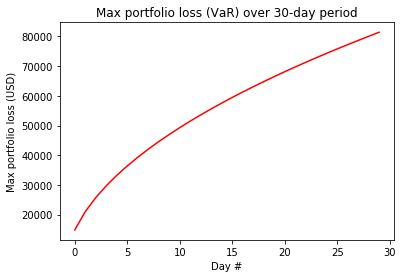

In [62]:
# Calculate n Day VaR
var_array = []
num_days = int(30)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 30-day period")
plt.plot(var_array, "r")

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


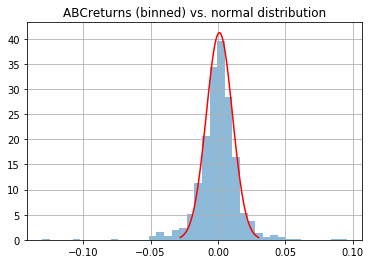

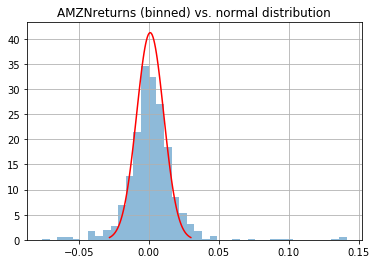

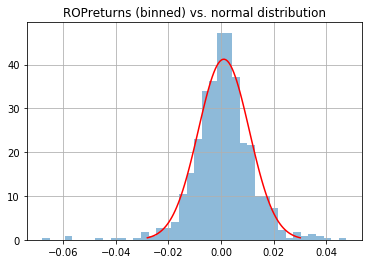

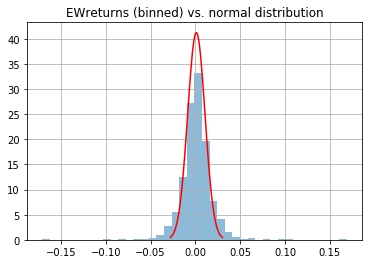

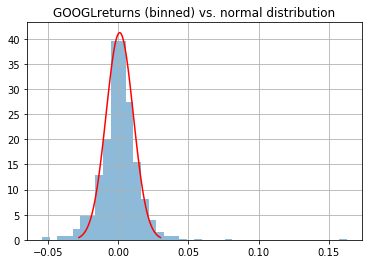

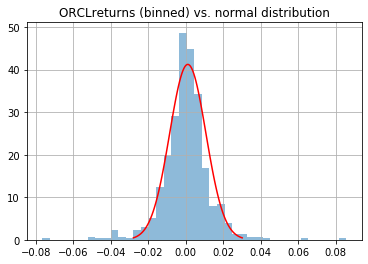

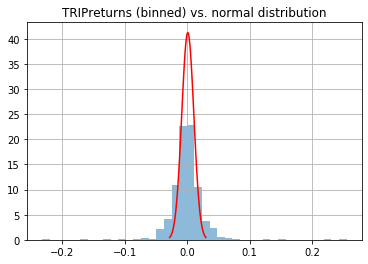

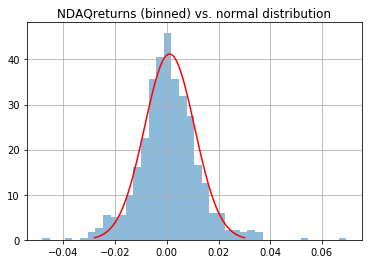

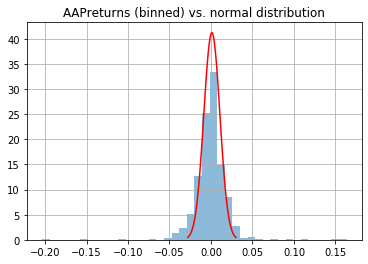

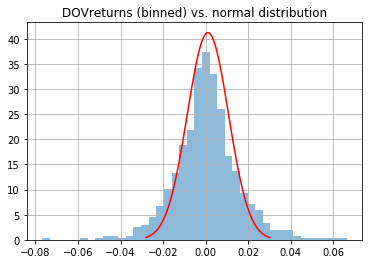

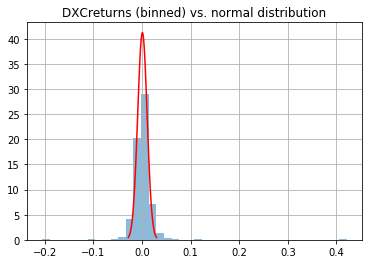

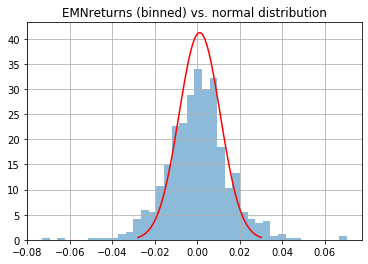

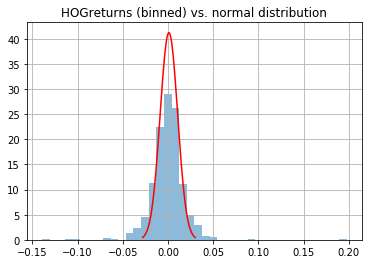

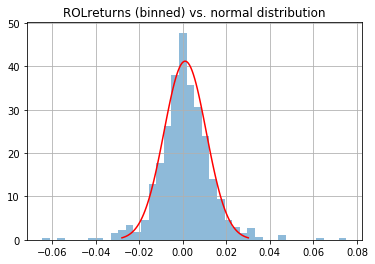

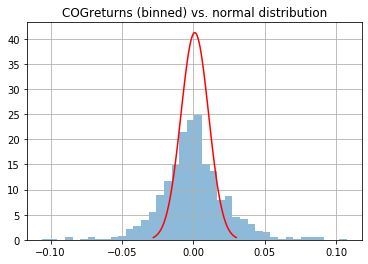

In [63]:
# Repeat for each equity in portfolio
for stock in tickers:
  returns[stock].hist(bins=40, normed=True,histtype="stepfilled",alpha=0.5)
  x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
  plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
  plt.title(stock + "returns (binned) vs. normal distribution")
  plt.show()